# Want to see graph in all organs to see where the difference is the most significant

# I] Import

In [2]:
import pandas, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

## functions & options


In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [4]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

## Data download and preparation

In [5]:
%%time
# DL data ATG7 isoform expression and High low expression separation
path = output_file_directory + "/ATG7/dataframes_for_input/"
df_ATG7_NormPrim= pandas.read_csv(path+'df_ATG7_NormPrim.csv', sep = ",")

#remove NaN value in OS column (will remove Normal Tissue).
df_ATG7_Prim = df_ATG7_NormPrim.dropna(axis=0)
print(df_ATG7_Prim.shape)
df_ATG7_Prim.head()

(9130, 22)
Wall time: 111 ms


,sample,Sample_Type,Primary_Site,OS,OS_time,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,...,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
7429,TCGA-OR-A5J2-01,Primary Tumor,Adrenal Gland,1.0,1677.0,4.824,3.239,1.903,1.258,28.323920,...,2.390640e+00,4.874006,3.384104,2.244552,15.569935,60.632203,24.013593,1.535420e+01,0.333301,0.132005
7430,TCGA-P6-A5OG-01,Primary Tumor,Adrenal Gland,1.0,383.0,4.790,4.056,1.151,-9.966,27.664191,...,-1.495113e-07,4.841178,4.140146,1.686916,18.851948,88.225740,11.774261,-7.930814e-07,0.601220,0.080236
7431,TCGA-OR-A5J8-01,Primary Tumor,Adrenal Gland,1.0,579.0,4.764,4.570,-1.639,-9.966,27.170080,...,-1.495113e-07,4.816092,4.629437,0.400624,24.071456,98.670297,1.329703,-6.211145e-07,0.874174,0.011781
7432,TCGA-OR-A5K5-01,Primary Tumor,Adrenal Gland,1.0,498.0,4.751,4.216,-2.727,-4.608,26.926343,...,4.000660e-02,4.803555,4.291540,0.201684,18.773186,98.987671,0.799224,2.131050e-01,0.690147,0.005572
7433,TCGA-PA-A5YG-01,Primary Tumor,Adrenal Gland,0.0,756.0,4.600,3.060,2.783,1.125,24.250465,...,2.180015e+00,4.658238,3.223226,2.978529,17.400563,47.922164,39.549417,1.252842e+01,0.343858,0.283781


In [6]:
tissue_labels = df_ATG7_Prim['Primary_Site'].value_counts()
tissue_labels = tissue_labels.reset_index()
tissue_labels = tissue_labels['index']

for i in range(len(tissue_labels)):
    tissue = tissue_labels[i]
    print(i, 'is', tissue)

0 is Breast
1 is Lung
2 is Kidney
3 is Brain
4 is Head And Neck Region
5 is Thyroid Gland
6 is Prostate
7 is Ovary
8 is Stomach
9 is Bladder
10 is Liver
11 is Cervix
12 is Colon
13 is Soft Tissue,Bone
14 is Esophagus
15 is Endometrium
16 is Pancreas
17 is Paraganglia
18 is Testis
19 is Thymus
20 is Skin
21 is Rectum
22 is Lining Of Body Cavities
23 is Eye
24 is Adrenal Gland
25 is Uterus
26 is Lymphatic Tissue
27 is Bile Duct


# II] Kaplan Meier graph & stats

For Breast


<lifelines.CoxPHFitter: fitted with 1090 total observations, 939 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1090
number of events observed = 151
   partial log-likelihood = -852.30
         time fit was run = 2022-02-26 11:47:21 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.40       1.49       0.28            -0.14             0.94                 0.87                 2.56
ATG7_1     -0.13       0.88       0.23            -0.58             0.33                 0.56                 1.39
ATG7_2      0.02       1.02       0.05            -0.08             0.11                 0.92                 1.12
ATG7_3     -0.03       0.98       0.04            -0.09             0.04                 0.91                 1.05

              z    p   -log2(p)
covariate                      
ATG7       1.44 0.15       2.75
ATG7_1    -0.55 0.58       0.78
ATG7_2     0.35 0.73       0.46
ATG7_3    -0.71 0.48       1.07
---
Concordance = 0.56
Partial AIC = 1712.59
log-likelihood ratio test = 4.36 on 4 df
-log2(p) of ll-ratio test = 1.47

Results for  ATG7(1) in Breast


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.98      0.03

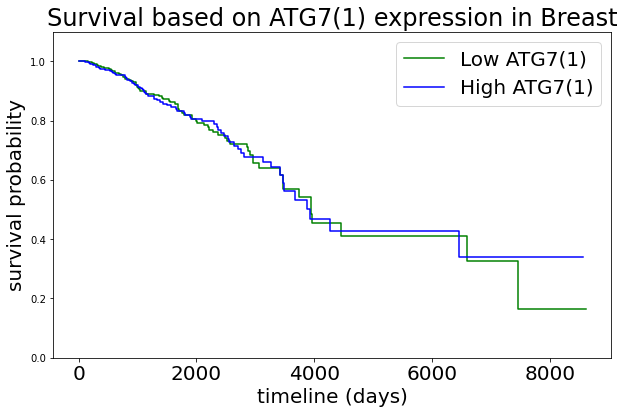

Results for  ATG7(2) in Breast


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.10 0.04      4.54

<Figure size 864x576 with 0 Axes>

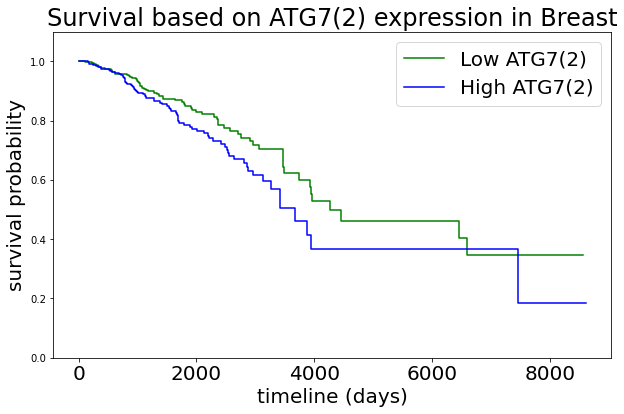

-------------------------------------------------------------------------

For Lung


<lifelines.CoxPHFitter: fitted with 996 total observations, 602 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 996
number of events observed = 394
   partial log-likelihood = -2368.13
         time fit was run = 2022-02-26 11:47:22 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.10       0.90       0.17            -0.43             0.22                 0.65                 1.25
ATG7_1      0.08       1.08       0.12            -0.16             0.31                 0.85                 1.36
ATG7_2      0.04       1.04       0.04            -0.03             0.11                 0.97                 1.12
ATG7_3      0.01       1.01       0.02            -0.03             0.05                 0.97                 1.05

              z    p   -log2(p)
covariate                      
ATG7      -0.63 0.53       0.92
ATG7_1     0.63 0.53       0.93
ATG7_2     1.16 0.25       2.02
ATG7_3     0.62 0.53       0.91
---
Concordance = 0.53
Partial AIC = 4744.26
log-likelihood ratio test = 3.35 on 4 df
-log2(p) of ll-ratio test = 1.00

Results for  ATG7(1) in Lung


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.35 0.55      0.85

<Figure size 864x576 with 0 Axes>

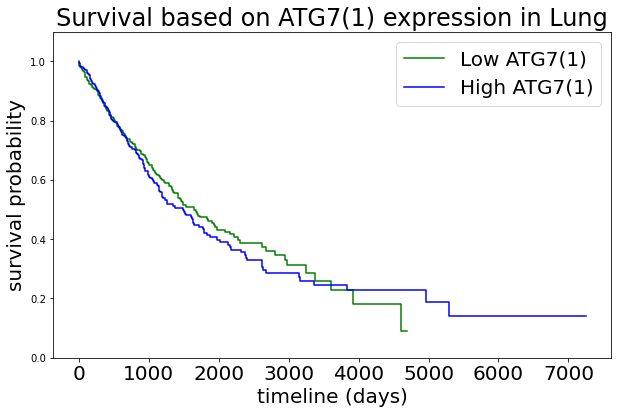

Results for  ATG7(2) in Lung


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.44 0.12      3.08

<Figure size 864x576 with 0 Axes>

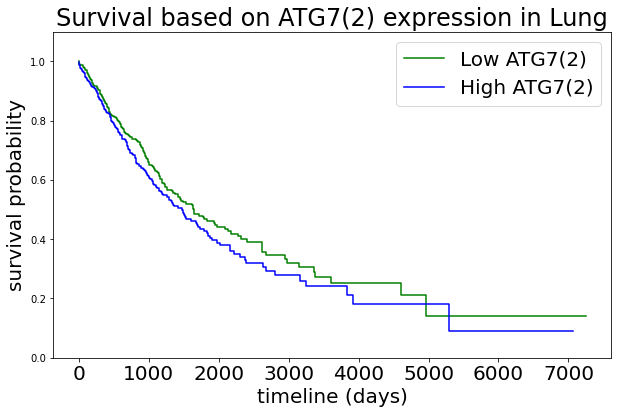

-------------------------------------------------------------------------

For Kidney


<lifelines.CoxPHFitter: fitted with 882 total observations, 656 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 882
number of events observed = 226
   partial log-likelihood = -1376.56
         time fit was run = 2022-02-26 11:47:23 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.09       1.09       0.25            -0.40             0.58                 0.67                 1.78
ATG7_1     -0.21       0.81       0.23            -0.66             0.23                 0.52                 1.26
ATG7_2     -0.04       0.96       0.03            -0.10             0.02                 0.91                 1.02
ATG7_3     -0.03       0.97       0.03            -0.08             0.02                 0.92                 1.02

              z    p   -log2(p)
covariate                      
ATG7       0.34 0.73       0.45
ATG7_1    -0.95 0.34       1.55
ATG7_2    -1.23 0.22       2.20
ATG7_3    -1.33 0.18       2.44
---
Concordance = 0.55
Partial AIC = 2761.13
log-likelihood ratio test = 11.15 on 4 df
-log2(p) of ll-ratio test = 5.33

Results for  ATG7(1) in Kidney


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.03 0.31      1.69

<Figure size 864x576 with 0 Axes>

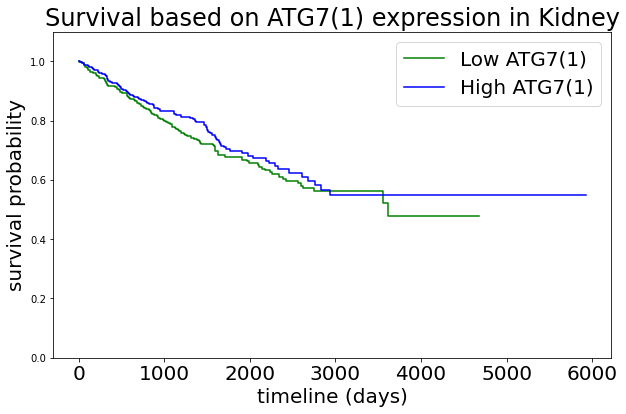

Results for  ATG7(2) in Kidney


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.24 0.01      6.32

<Figure size 864x576 with 0 Axes>

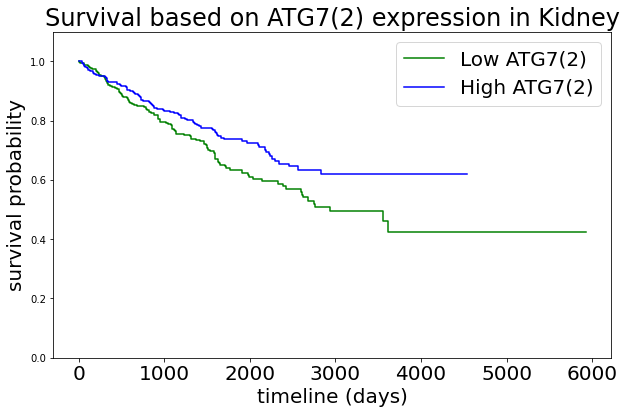

-------------------------------------------------------------------------

For Brain


<lifelines.CoxPHFitter: fitted with 659 total observations, 417 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 659
number of events observed = 242
   partial log-likelihood = -1327.43
         time fit was run = 2022-02-26 11:47:24 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.48       1.61       0.36            -0.22             1.18                 0.80                 3.25
ATG7_1      0.15       1.16       0.36            -0.56             0.85                 0.57                 2.35
ATG7_2      0.04       1.04       0.03            -0.02             0.09                 0.98                 1.09
ATG7_3     -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03

              z    p   -log2(p)
covariate                      
ATG7       1.34 0.18       2.47
ATG7_1     0.41 0.69       0.54
ATG7_2     1.31 0.19       2.39
ATG7_3    -0.29 0.77       0.38
---
Concordance = 0.60
Partial AIC = 2662.87
log-likelihood ratio test = 21.39 on 4 df
-log2(p) of ll-ratio test = 11.88

Results for  ATG7(1) in Brain


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.13 0.04      4.57

<Figure size 864x576 with 0 Axes>

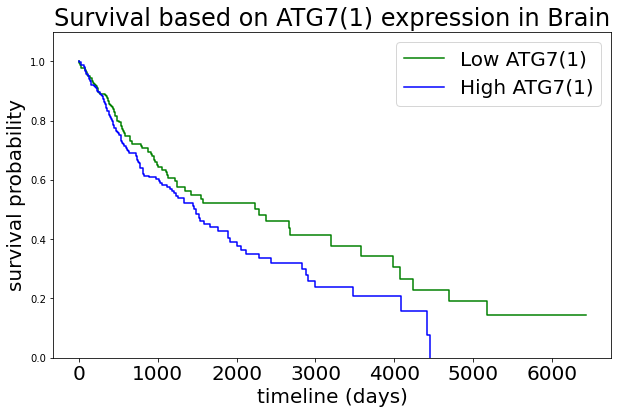

Results for  ATG7(2) in Brain


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.30 <0.005     10.34

<Figure size 864x576 with 0 Axes>

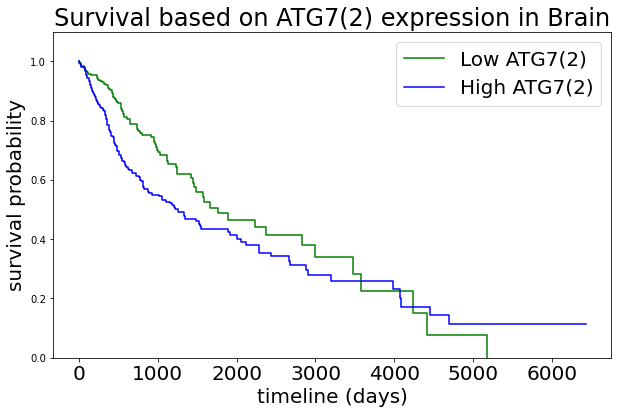

-------------------------------------------------------------------------

For Head And Neck Region


<lifelines.CoxPHFitter: fitted with 517 total observations, 297 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 517
number of events observed = 220
   partial log-likelihood = -1205.05
         time fit was run = 2022-02-26 11:47:25 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.12       1.13       0.22            -0.32             0.56                 0.73                 1.75
ATG7_1     -0.24       0.79       0.16            -0.56             0.08                 0.57                 1.09
ATG7_2     -0.03       0.97       0.05            -0.13             0.06                 0.88                 1.06
ATG7_3     -0.01       0.99       0.03            -0.07             0.05                 0.94                 1.05

              z    p   -log2(p)
covariate                      
ATG7       0.54 0.59       0.77
ATG7_1    -1.45 0.15       2.78
ATG7_2    -0.72 0.47       1.08
ATG7_3    -0.25 0.81       0.31
---
Concordance = 0.52
Partial AIC = 2418.11
log-likelihood ratio test = 2.91 on 4 df
-log2(p) of ll-ratio test = 0.80

Results for  ATG7(1) in Head And Neck Region


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.48 0.06      4.01

<Figure size 864x576 with 0 Axes>

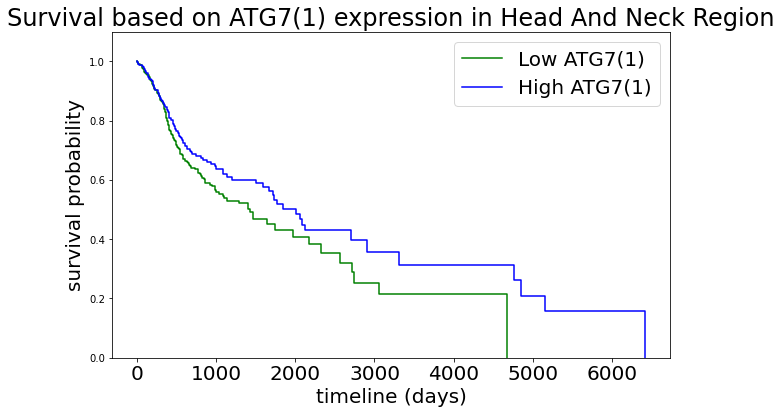

Results for  ATG7(2) in Head And Neck Region


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.57 0.45      1.15

<Figure size 864x576 with 0 Axes>

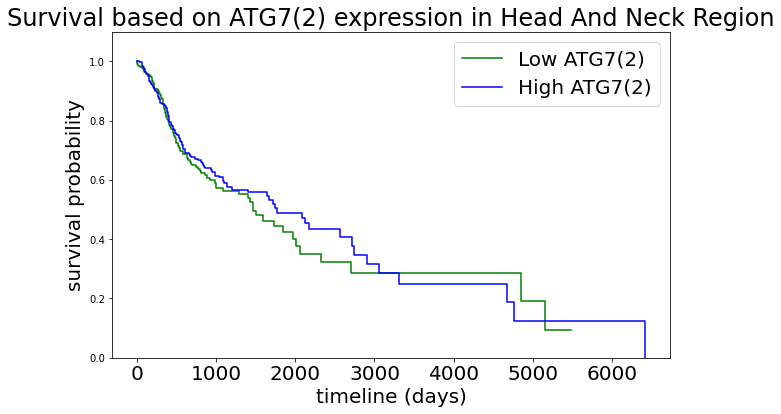

-------------------------------------------------------------------------

For Thyroid Gland


<lifelines.CoxPHFitter: fitted with 504 total observations, 488 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 504
number of events observed = 16
   partial log-likelihood = -81.83
         time fit was run = 2022-02-26 11:47:25 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.45       0.64       1.34            -3.08             2.18                 0.05                 8.89
ATG7_1      0.86       2.35       1.06            -1.21             2.93                 0.30                18.68
ATG7_2      0.24       1.27       0.20            -0.16             0.64                 0.85                 1.89
ATG7_3      0.02       1.02       0.10            -0.16             0.21                 0.85                 1.23

              z    p   -log2(p)
covariate                      
ATG7      -0.33 0.74       0.44
ATG7_1     0.81 0.42       1.26
ATG7_2     1.17 0.24       2.04
ATG7_3     0.24 0.81       0.31
---
Concordance = 0.60
Partial AIC = 171.65
log-likelihood ratio test = 4.10 on 4 df
-log2(p) of ll-ratio test = 1.35

Results for  ATG7(1) in Thyroid Gland


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.05 0.83      0.27

<Figure size 864x576 with 0 Axes>

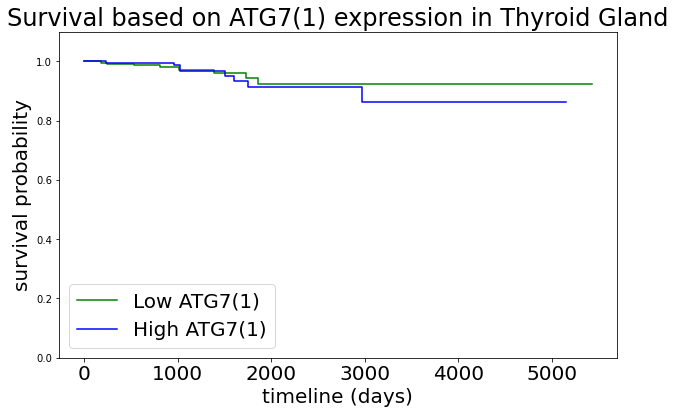

Results for  ATG7(2) in Thyroid Gland


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.13 0.14      2.80

<Figure size 864x576 with 0 Axes>

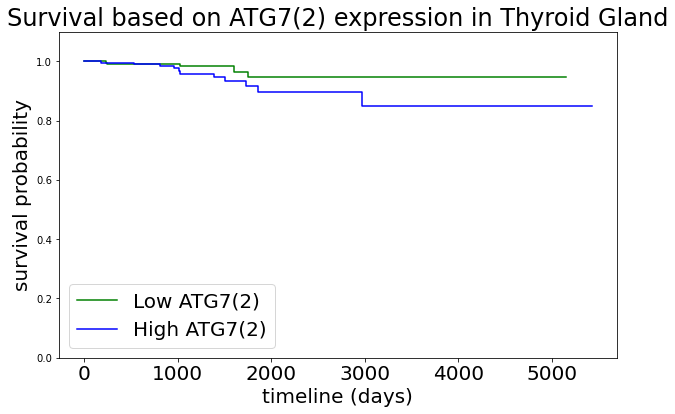

-------------------------------------------------------------------------

For Prostate


<lifelines.CoxPHFitter: fitted with 495 total observations, 485 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 495
number of events observed = 10
   partial log-likelihood = -45.56
         time fit was run = 2022-02-26 11:47:26 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.07       1.07       1.41            -2.69             2.83                 0.07                17.02
ATG7_1      0.10       1.10       1.21            -2.28             2.48                 0.10                11.93
ATG7_2     -0.01       0.99       0.14            -0.28             0.27                 0.76                 1.31
ATG7_3     -0.02       0.98       0.12            -0.24             0.21                 0.78                 1.23

              z    p   -log2(p)
covariate                      
ATG7       0.05 0.96       0.06
ATG7_1     0.08 0.93       0.10
ATG7_2    -0.04 0.97       0.05
ATG7_3    -0.14 0.89       0.17
---
Concordance = 0.48
Partial AIC = 99.12
log-likelihood ratio test = 0.11 on 4 df
-log2(p) of ll-ratio test = 0.00

Results for  ATG7(1) in Prostate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.45 0.50      0.99

<Figure size 864x576 with 0 Axes>

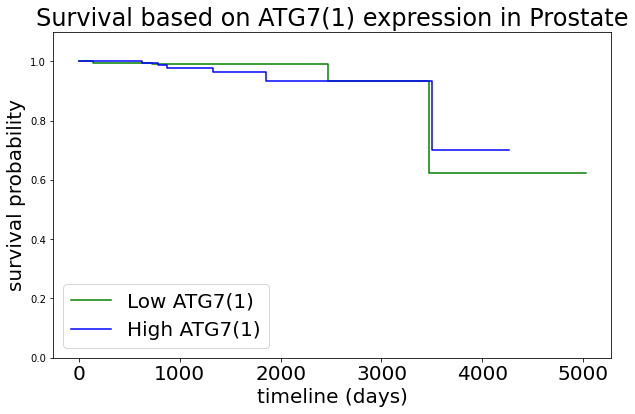

Results for  ATG7(2) in Prostate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.70      0.51

<Figure size 864x576 with 0 Axes>

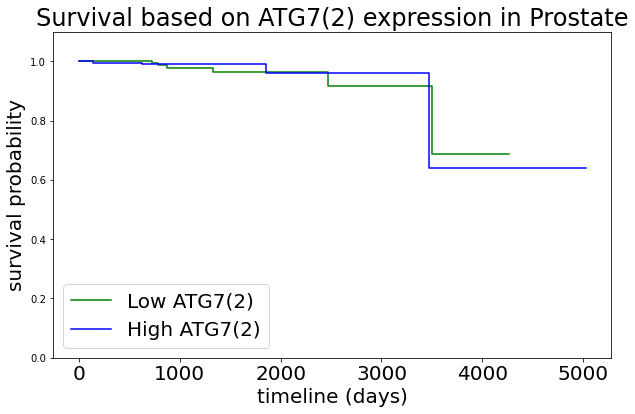

-------------------------------------------------------------------------

For Ovary


<lifelines.CoxPHFitter: fitted with 417 total observations, 155 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 417
number of events observed = 262
   partial log-likelihood = -1331.93
         time fit was run = 2022-02-26 11:47:27 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.03       1.03       0.18            -0.31             0.38                 0.73                 1.47
ATG7_1     -0.09       0.92       0.16            -0.39             0.22                 0.67                 1.24
ATG7_2      0.02       1.02       0.03            -0.05             0.08                 0.95                 1.09
ATG7_3      0.01       1.01       0.02            -0.03             0.04                 0.97                 1.04

              z    p   -log2(p)
covariate                      
ATG7       0.19 0.85       0.24
ATG7_1    -0.56 0.57       0.80
ATG7_2     0.54 0.59       0.76
ATG7_3     0.38 0.71       0.50
---
Concordance = 0.51
Partial AIC = 2671.86
log-likelihood ratio test = 2.07 on 4 df
-log2(p) of ll-ratio test = 0.47

Results for  ATG7(1) in Ovary


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.74 0.39      1.36

<Figure size 864x576 with 0 Axes>

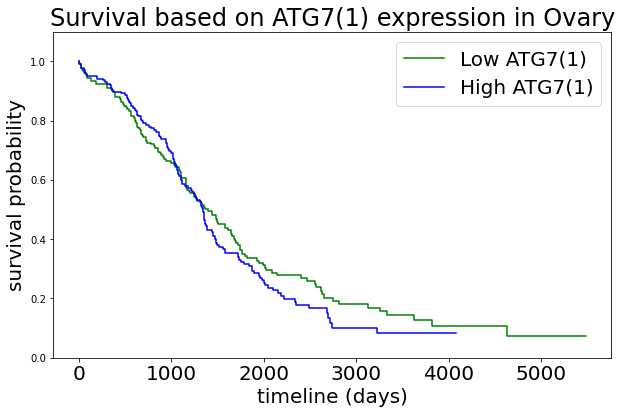

Results for  ATG7(2) in Ovary


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.59 0.44      1.18

<Figure size 864x576 with 0 Axes>

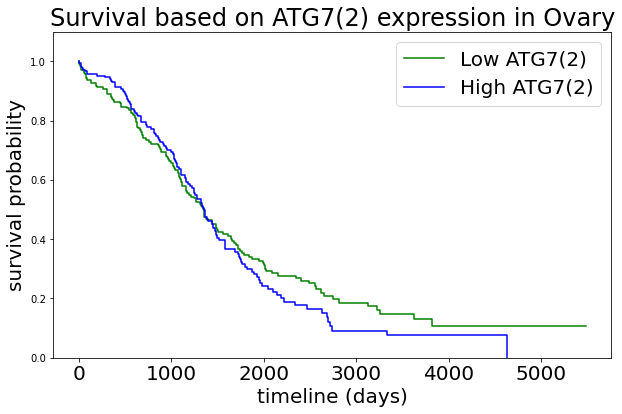

-------------------------------------------------------------------------

For Stomach


<lifelines.CoxPHFitter: fitted with 408 total observations, 251 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 408
number of events observed = 157
   partial log-likelihood = -828.73
         time fit was run = 2022-02-26 11:47:28 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.07       0.93       0.24            -0.55             0.40                 0.58                 1.50
ATG7_1      0.31       1.37       0.21            -0.11             0.73                 0.90                 2.08
ATG7_2     -0.05       0.96       0.03            -0.11             0.02                 0.89                 1.02
ATG7_3      0.02       1.02       0.02            -0.02             0.07                 0.98                 1.07

              z    p   -log2(p)
covariate                      
ATG7      -0.31 0.76       0.40
ATG7_1     1.46 0.14       2.80
ATG7_2    -1.35 0.18       2.50
ATG7_3     0.97 0.33       1.60
---
Concordance = 0.57
Partial AIC = 1665.45
log-likelihood ratio test = 6.84 on 4 df
-log2(p) of ll-ratio test = 2.79

Results for  ATG7(1) in Stomach


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.11 0.15      2.77

<Figure size 864x576 with 0 Axes>

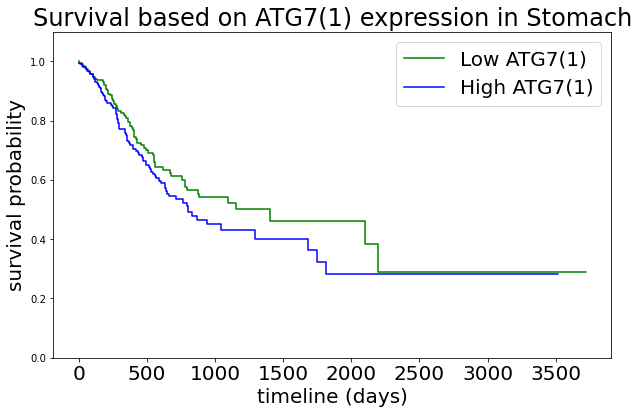

Results for  ATG7(2) in Stomach


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.61 0.20      2.29

<Figure size 864x576 with 0 Axes>

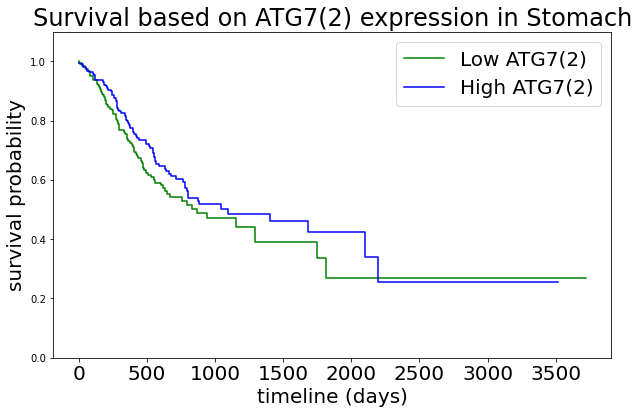

-------------------------------------------------------------------------

For Bladder


<lifelines.CoxPHFitter: fitted with 406 total observations, 229 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 406
number of events observed = 177
   partial log-likelihood = -940.66
         time fit was run = 2022-02-26 11:47:29 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.07       0.93       0.28            -0.62             0.48                 0.54                 1.61
ATG7_1      0.04       1.04       0.24            -0.43             0.50                 0.65                 1.65
ATG7_2      0.03       1.03       0.04            -0.05             0.11                 0.96                 1.12
ATG7_3      0.02       1.02       0.03            -0.03             0.07                 0.97                 1.08

              z    p   -log2(p)
covariate                      
ATG7      -0.25 0.80       0.32
ATG7_1     0.16 0.87       0.19
ATG7_2     0.83 0.41       1.30
ATG7_3     0.84 0.40       1.32
---
Concordance = 0.55
Partial AIC = 1889.32
log-likelihood ratio test = 4.86 on 4 df
-log2(p) of ll-ratio test = 1.72

Results for  ATG7(1) in Bladder


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.11 0.74      0.44

<Figure size 864x576 with 0 Axes>

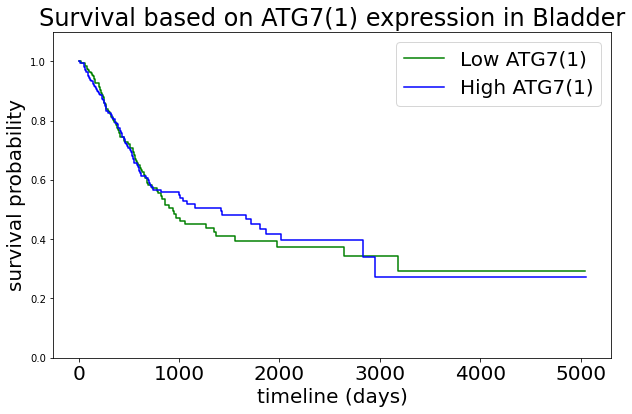

Results for  ATG7(2) in Bladder


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.24 0.04      4.66

<Figure size 864x576 with 0 Axes>

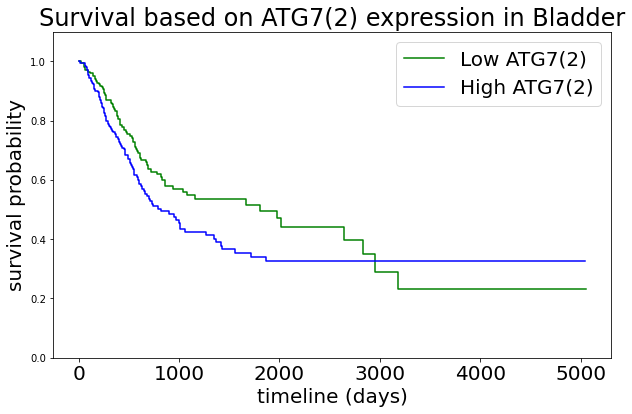

-------------------------------------------------------------------------

For Liver


<lifelines.CoxPHFitter: fitted with 368 total observations, 240 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 368
number of events observed = 128
   partial log-likelihood = -645.22
         time fit was run = 2022-02-26 11:47:29 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.09       0.91       0.35            -0.79             0.60                 0.46                 1.82
ATG7_1      0.76       2.14       0.33             0.11             1.41                 1.11                 4.10
ATG7_2      0.05       1.05       0.04            -0.04             0.13                 0.96                 1.14
ATG7_3      0.01       1.01       0.03            -0.05             0.07                 0.95                 1.08

              z    p   -log2(p)
covariate                      
ATG7      -0.26 0.79       0.34
ATG7_1     2.28 0.02       5.46
ATG7_2     1.09 0.28       1.86
ATG7_3     0.40 0.69       0.54
---
Concordance = 0.61
Partial AIC = 1298.44
log-likelihood ratio test = 15.88 on 4 df
-log2(p) of ll-ratio test = 8.30

Results for  ATG7(1) in Liver


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
           9.64 <0.005      9.04

<Figure size 864x576 with 0 Axes>

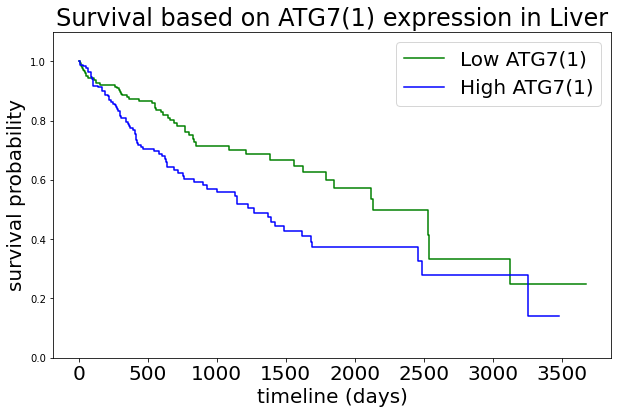

Results for  ATG7(2) in Liver


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.50 0.48      1.06

<Figure size 864x576 with 0 Axes>

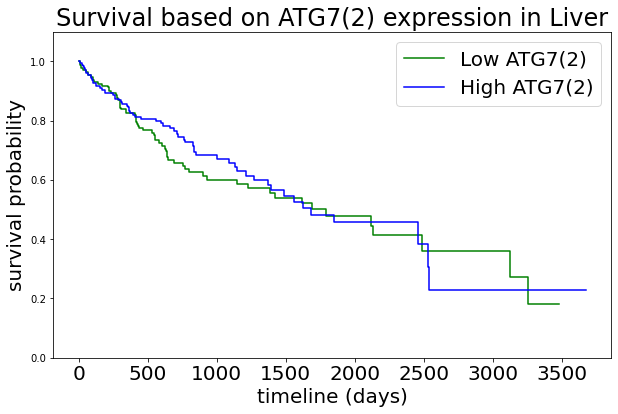

-------------------------------------------------------------------------

For Cervix


<lifelines.CoxPHFitter: fitted with 304 total observations, 233 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 304
number of events observed = 71
   partial log-likelihood = -341.94
         time fit was run = 2022-02-26 11:47:30 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.51       1.67       0.46            -0.39             1.42                 0.68                 4.13
ATG7_1     -0.67       0.51       0.37            -1.39             0.05                 0.25                 1.05
ATG7_2     -0.01       0.99       0.08            -0.16             0.14                 0.85                 1.15
ATG7_3     -0.01       0.99       0.05            -0.10             0.09                 0.90                 1.09

              z    p   -log2(p)
covariate                      
ATG7       1.11 0.27       1.91
ATG7_1    -1.82 0.07       3.86
ATG7_2    -0.09 0.93       0.11
ATG7_3    -0.11 0.91       0.14
---
Concordance = 0.59
Partial AIC = 691.89
log-likelihood ratio test = 6.55 on 4 df
-log2(p) of ll-ratio test = 2.63

Results for  ATG7(1) in Cervix


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.83 0.02      5.99

<Figure size 864x576 with 0 Axes>

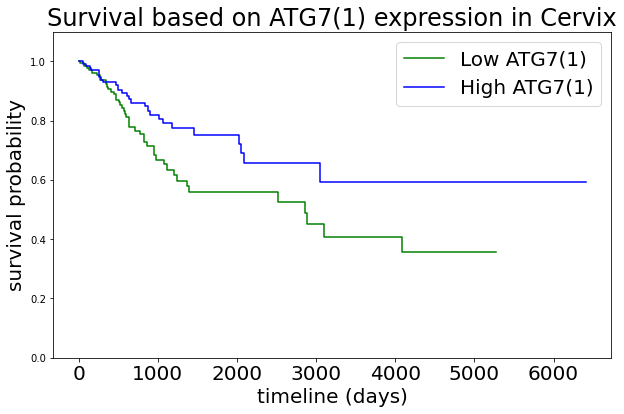

Results for  ATG7(2) in Cervix


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.94 0.05      4.41

<Figure size 864x576 with 0 Axes>

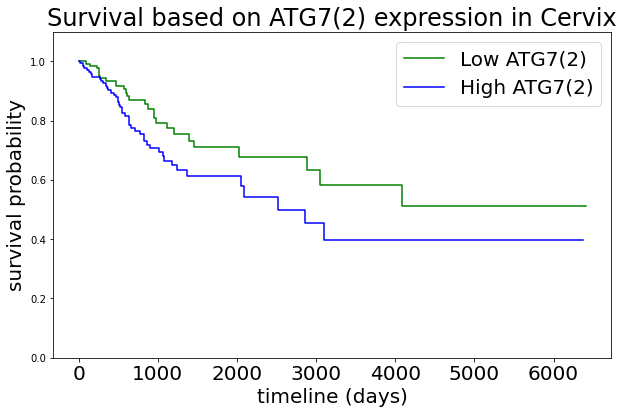

-------------------------------------------------------------------------

For Colon


<lifelines.CoxPHFitter: fitted with 286 total observations, 217 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 286
number of events observed = 69
   partial log-likelihood = -330.10
         time fit was run = 2022-02-26 11:47:31 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.96       0.38       0.48            -1.89            -0.02                 0.15                 0.98
ATG7_1      0.66       1.94       0.37            -0.07             1.39                 0.94                 4.03
ATG7_2      0.16       1.17       0.12            -0.07             0.40                 0.93                 1.49
ATG7_3     -0.00       1.00       0.04            -0.09             0.09                 0.92                 1.09

              z    p   -log2(p)
covariate                      
ATG7      -2.00 0.05       4.46
ATG7_1     1.78 0.07       3.75
ATG7_2     1.34 0.18       2.47
ATG7_3    -0.02 0.98       0.03
---
Concordance = 0.60
Partial AIC = 668.20
log-likelihood ratio test = 6.84 on 4 df
-log2(p) of ll-ratio test = 2.79

Results for  ATG7(1) in Colon


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.86      0.23

<Figure size 864x576 with 0 Axes>

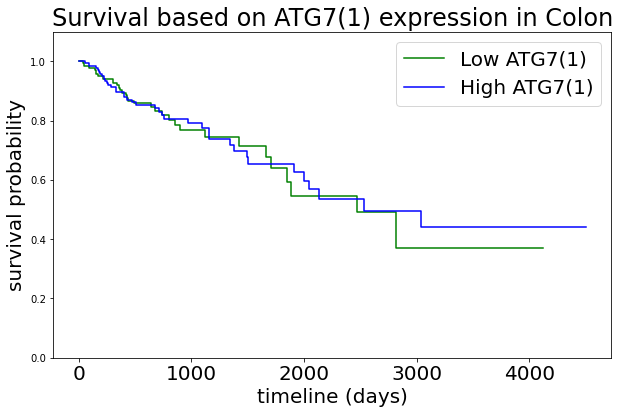

Results for  ATG7(2) in Colon


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.70 0.19      2.37

<Figure size 864x576 with 0 Axes>

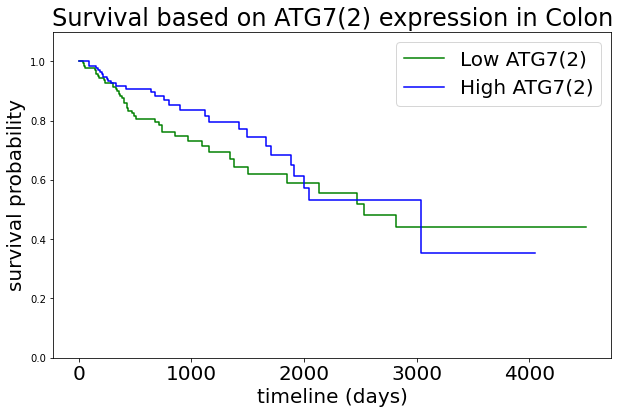

-------------------------------------------------------------------------

For Soft Tissue,Bone


<lifelines.CoxPHFitter: fitted with 258 total observations, 160 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 258
number of events observed = 98
   partial log-likelihood = -477.23
         time fit was run = 2022-02-26 11:47:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.09       0.91       0.38            -0.85             0.66                 0.43                 1.94
ATG7_1      0.09       1.10       0.33            -0.55             0.74                 0.58                 2.09
ATG7_2     -0.02       0.98       0.04            -0.10             0.06                 0.91                 1.06
ATG7_3      0.01       1.01       0.03            -0.06             0.07                 0.95                 1.07

              z    p   -log2(p)
covariate                      
ATG7      -0.24 0.81       0.30
ATG7_1     0.28 0.78       0.36
ATG7_2    -0.44 0.66       0.60
ATG7_3     0.22 0.83       0.27
---
Concordance = 0.52
Partial AIC = 962.46
log-likelihood ratio test = 0.62 on 4 df
-log2(p) of ll-ratio test = 0.06

Results for  ATG7(1) in Soft Tissue,Bone


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.06 0.81      0.30

<Figure size 864x576 with 0 Axes>

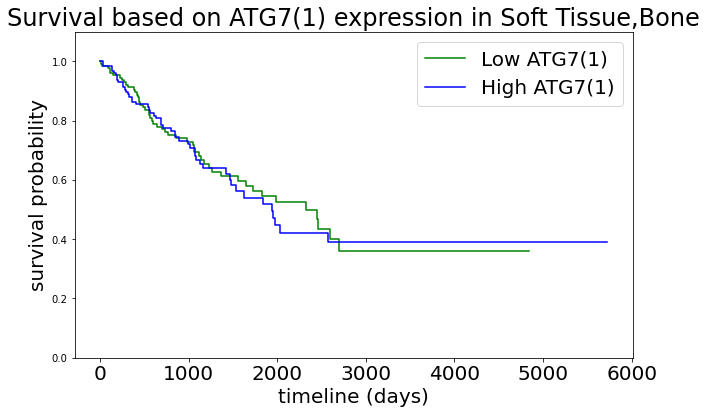

Results for  ATG7(2) in Soft Tissue,Bone


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.19 0.67      0.59

<Figure size 864x576 with 0 Axes>

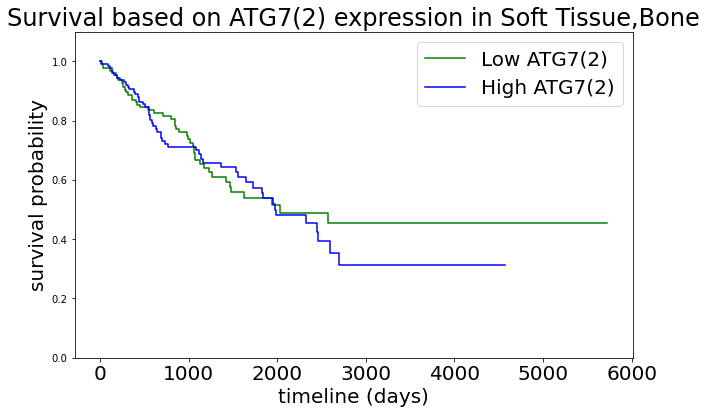

-------------------------------------------------------------------------

For Esophagus


<lifelines.CoxPHFitter: fitted with 181 total observations, 105 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 181
number of events observed = 76
   partial log-likelihood = -326.45
         time fit was run = 2022-02-26 11:47:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.10       1.10       0.49            -0.86             1.05                 0.42                 2.87
ATG7_1      0.05       1.05       0.30            -0.54             0.63                 0.59                 1.88
ATG7_2     -0.08       0.92       0.14            -0.36             0.20                 0.70                 1.22
ATG7_3     -0.01       0.99       0.03            -0.07             0.04                 0.93                 1.05

              z    p   -log2(p)
covariate                      
ATG7       0.20 0.84       0.25
ATG7_1     0.16 0.87       0.20
ATG7_2    -0.58 0.56       0.84
ATG7_3    -0.44 0.66       0.60
---
Concordance = 0.54
Partial AIC = 660.90
log-likelihood ratio test = 1.12 on 4 df
-log2(p) of ll-ratio test = 0.17

Results for  ATG7(1) in Esophagus


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.96

<Figure size 864x576 with 0 Axes>

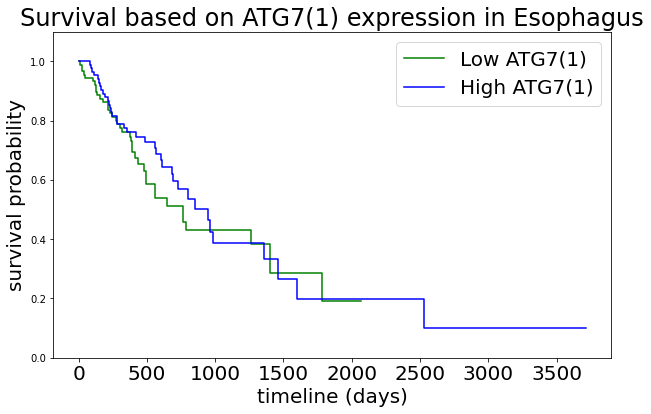

Results for  ATG7(2) in Esophagus


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.02 0.31      1.68

<Figure size 864x576 with 0 Axes>

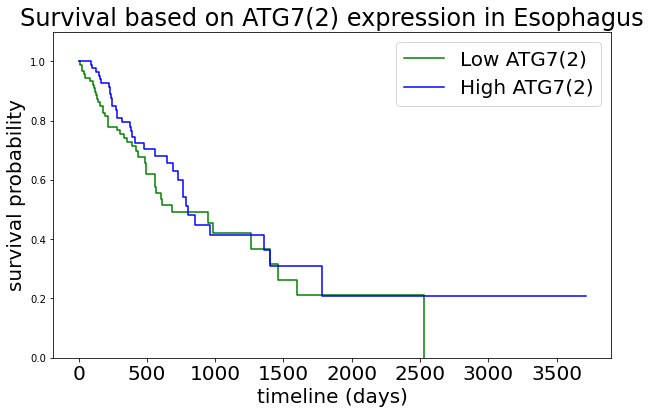

-------------------------------------------------------------------------

For Endometrium


<lifelines.CoxPHFitter: fitted with 179 total observations, 146 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 179
number of events observed = 33
   partial log-likelihood = -137.20
         time fit was run = 2022-02-26 11:47:33 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.85       0.43       0.62            -2.07             0.36                 0.13                 1.43
ATG7_1     -0.05       0.95       0.43            -0.89             0.79                 0.41                 2.20
ATG7_2      0.04       1.04       0.07            -0.10             0.17                 0.90                 1.19
ATG7_3     -0.01       0.99       0.05            -0.12             0.09                 0.89                 1.10

              z    p   -log2(p)
covariate                      
ATG7      -1.38 0.17       2.57
ATG7_1    -0.12 0.90       0.14
ATG7_2     0.52 0.60       0.74
ATG7_3    -0.25 0.81       0.31
---
Concordance = 0.62
Partial AIC = 282.39
log-likelihood ratio test = 5.89 on 4 df
-log2(p) of ll-ratio test = 2.27

Results for  ATG7(1) in Endometrium


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.26 0.13      2.91

<Figure size 864x576 with 0 Axes>

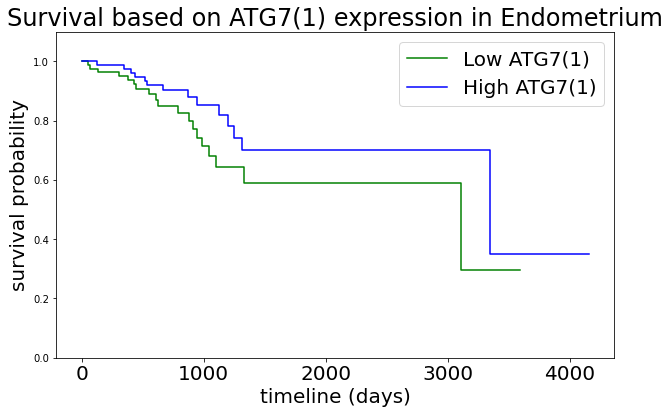

Results for  ATG7(2) in Endometrium


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.02 0.31      1.67

<Figure size 864x576 with 0 Axes>

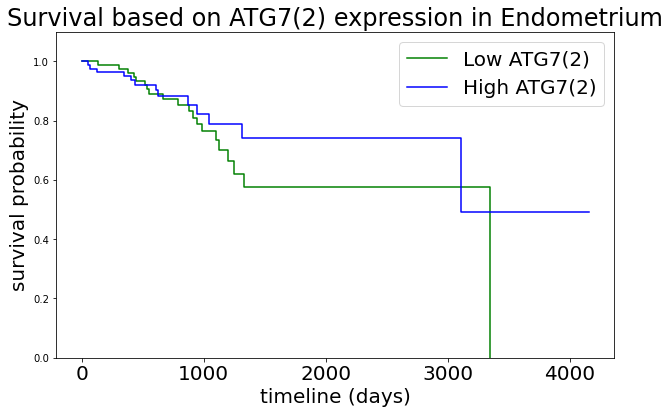

-------------------------------------------------------------------------

For Pancreas


<lifelines.CoxPHFitter: fitted with 178 total observations, 85 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 178
number of events observed = 93
   partial log-likelihood = -408.22
         time fit was run = 2022-02-26 11:47:34 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.77       2.16       0.40            -0.00             1.55                 1.00                 4.70
ATG7_1     -0.30       0.74       0.33            -0.96             0.35                 0.38                 1.42
ATG7_2     -0.09       0.92       0.06            -0.20             0.03                 0.81                 1.03
ATG7_3      0.03       1.03       0.04            -0.04             0.10                 0.96                 1.11

              z    p   -log2(p)
covariate                      
ATG7       1.95 0.05       4.28
ATG7_1    -0.90 0.37       1.45
ATG7_2    -1.43 0.15       2.71
ATG7_3     0.88 0.38       1.41
---
Concordance = 0.59
Partial AIC = 824.44
log-likelihood ratio test = 9.01 on 4 df
-log2(p) of ll-ratio test = 4.04

Results for  ATG7(1) in Pancreas


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35

<Figure size 864x576 with 0 Axes>

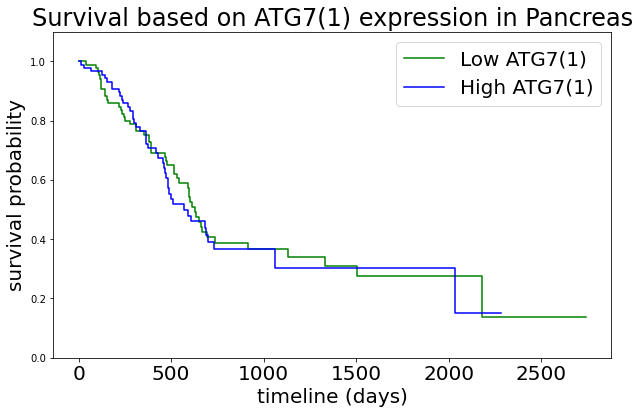

Results for  ATG7(2) in Pancreas


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.73 0.01      7.53

<Figure size 864x576 with 0 Axes>

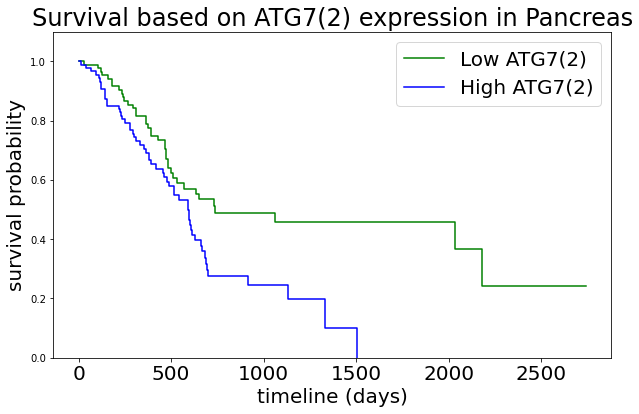

-------------------------------------------------------------------------

For Paraganglia


<lifelines.CoxPHFitter: fitted with 177 total observations, 171 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 177
number of events observed = 6
   partial log-likelihood = -22.98
         time fit was run = 2022-02-26 11:47:35 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -3.59       0.03       2.59            -8.66             1.48                 0.00                 4.41
ATG7_1      1.98       7.27       2.13            -2.20             6.16                 0.11               475.03
ATG7_2      0.40       1.50       0.34            -0.26             1.07                 0.77                 2.92
ATG7_3      0.33       1.40       0.19            -0.04             0.71                 0.96                 2.03

              z    p   -log2(p)
covariate                      
ATG7      -1.39 0.17       2.59
ATG7_1     0.93 0.35       1.51
ATG7_2     1.19 0.23       2.09
ATG7_3     1.74 0.08       3.61
---
Concordance = 0.77
Partial AIC = 53.96
log-likelihood ratio test = 5.60 on 4 df
-log2(p) of ll-ratio test = 2.11

Results for  ATG7(1) in Paraganglia


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.33 0.57      0.82

<Figure size 864x576 with 0 Axes>

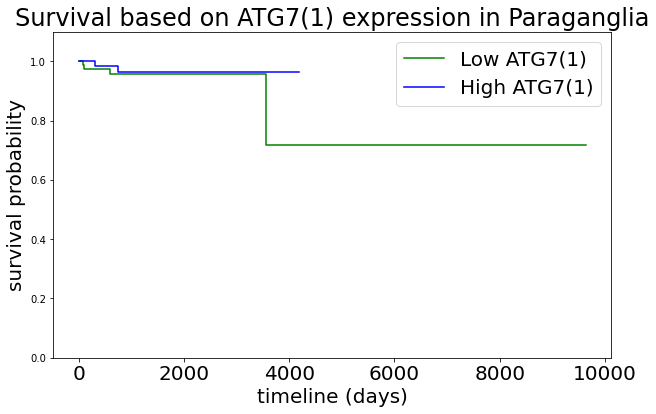

Results for  ATG7(2) in Paraganglia


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.80 0.05      4.28

<Figure size 864x576 with 0 Axes>

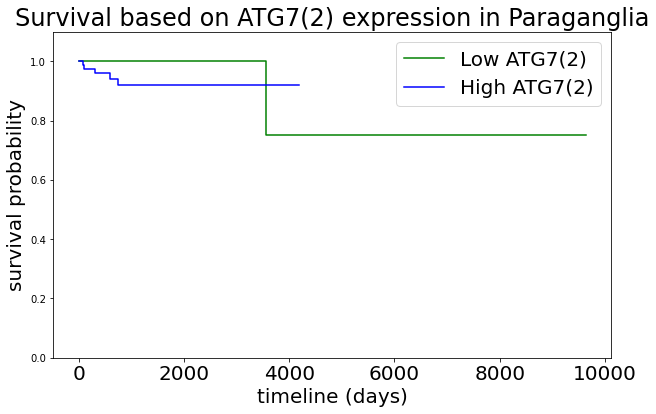

-------------------------------------------------------------------------

For Testis


<lifelines.CoxPHFitter: fitted with 132 total observations, 128 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 132
number of events observed = 4
   partial log-likelihood = -13.97
         time fit was run = 2022-02-26 11:47:35 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.89       0.41       2.99            -6.75             4.97                 0.00               144.67
ATG7_1      1.38       3.99       1.92            -2.38             5.15                 0.09               172.11
ATG7_2      0.50       1.65       1.14            -1.73             2.73                 0.18                15.28
ATG7_3      0.24       1.27       0.30            -0.34             0.83                 0.71                 2.29

              z    p   -log2(p)
covariate                      
ATG7      -0.30 0.77       0.38
ATG7_1     0.72 0.47       1.09
ATG7_2     0.44 0.66       0.60
ATG7_3     0.81 0.42       1.27
---
Concordance = 0.73
Partial AIC = 35.94
log-likelihood ratio test = 3.22 on 4 df
-log2(p) of ll-ratio test = 0.94

Results for  ATG7(1) in Testis


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.04

<Figure size 864x576 with 0 Axes>

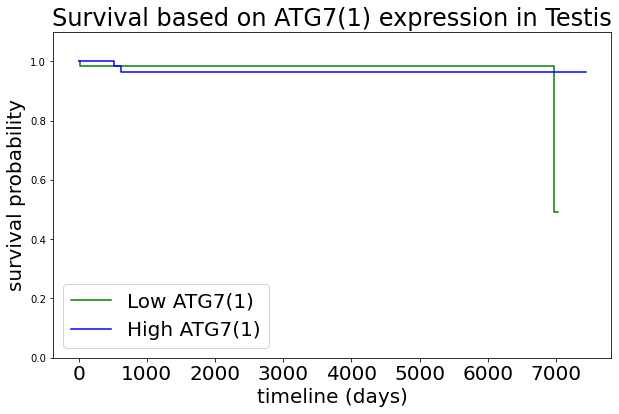

Results for  ATG7(2) in Testis


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.10 0.75      0.41

<Figure size 864x576 with 0 Axes>

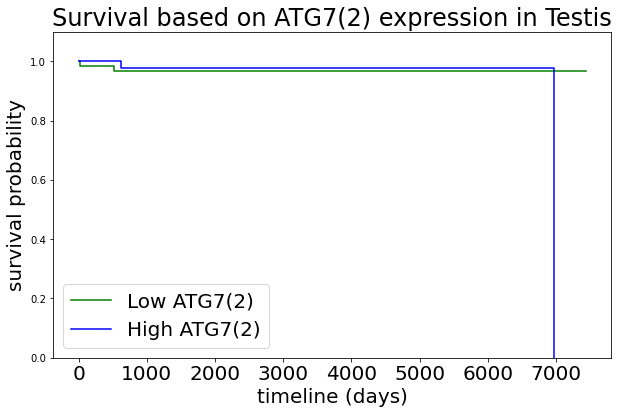

-------------------------------------------------------------------------

For Thymus


<lifelines.CoxPHFitter: fitted with 118 total observations, 110 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 118
number of events observed = 8
   partial log-likelihood = -25.27
         time fit was run = 2022-02-26 11:47:36 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -1.60       0.20       1.93            -5.39             2.19                 0.00                 8.96
ATG7_1      4.31      74.68       1.96             0.46             8.16                 1.59              3504.87
ATG7_2      0.19       1.21       0.22            -0.23             0.62                 0.79                 1.85
ATG7_3      0.20       1.22       0.14            -0.07             0.47                 0.93                 1.59

              z    p   -log2(p)
covariate                      
ATG7      -0.83 0.41       1.29
ATG7_1     2.20 0.03       5.16
ATG7_2     0.88 0.38       1.40
ATG7_3     1.43 0.15       2.71
---
Concordance = 0.78
Partial AIC = 58.54
log-likelihood ratio test = 9.38 on 4 df
-log2(p) of ll-ratio test = 4.26

Results for  ATG7(1) in Thymus


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.10 0.29      1.77

<Figure size 864x576 with 0 Axes>

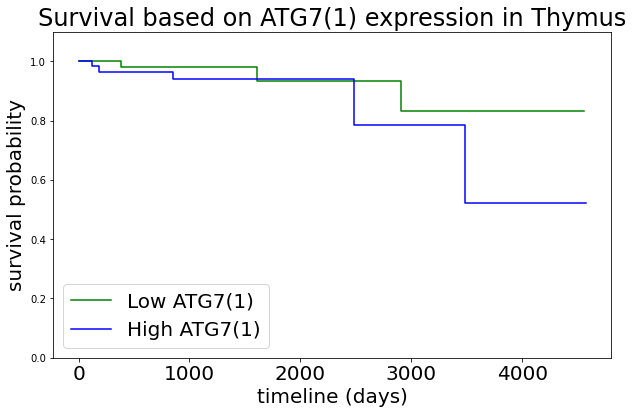

Results for  ATG7(2) in Thymus


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.87      0.20

<Figure size 864x576 with 0 Axes>

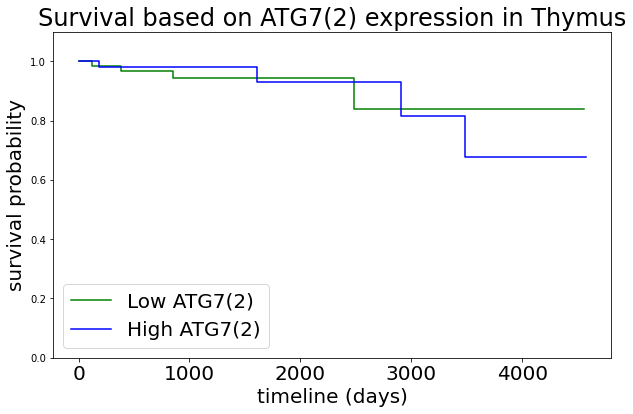

-------------------------------------------------------------------------

For Skin


<lifelines.CoxPHFitter: fitted with 102 total observations, 74 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 102
number of events observed = 28
   partial log-likelihood = -101.02
         time fit was run = 2022-02-26 11:47:37 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        1.00       2.71       0.90            -0.77             2.77                 0.46                15.93
ATG7_1     -1.02       0.36       0.71            -2.42             0.38                 0.09                 1.46
ATG7_2     -0.11       0.90       0.09            -0.28             0.06                 0.76                 1.07
ATG7_3     -0.00       1.00       0.08            -0.16             0.16                 0.85                 1.17

              z    p   -log2(p)
covariate                      
ATG7       1.10 0.27       1.89
ATG7_1    -1.43 0.15       2.72
ATG7_2    -1.23 0.22       2.20
ATG7_3    -0.01 0.99       0.01
---
Concordance = 0.60
Partial AIC = 210.04
log-likelihood ratio test = 3.26 on 4 df
-log2(p) of ll-ratio test = 0.96

Results for  ATG7(1) in Skin


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.38 0.24      2.06

<Figure size 864x576 with 0 Axes>

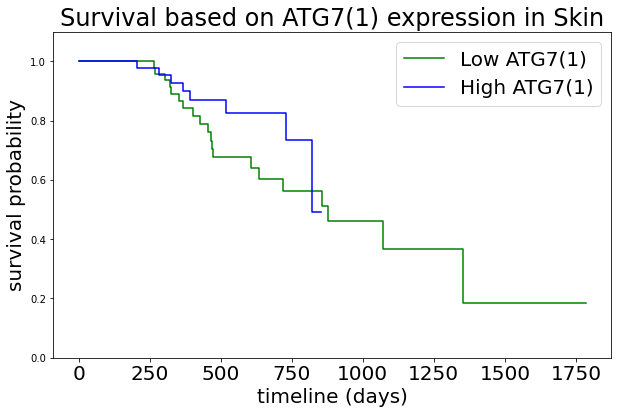

Results for  ATG7(2) in Skin


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.06 0.30      1.72

<Figure size 864x576 with 0 Axes>

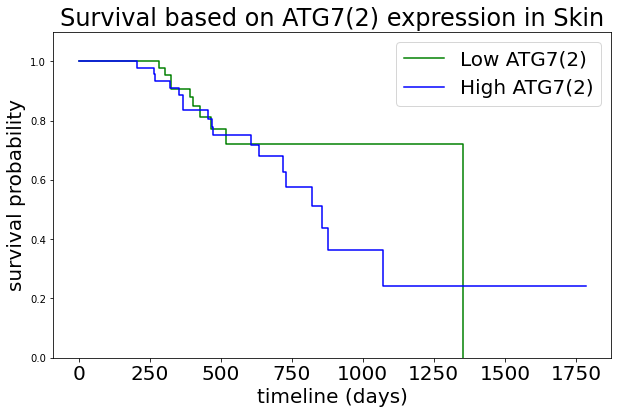

-------------------------------------------------------------------------

For Rectum


<lifelines.CoxPHFitter: fitted with 91 total observations, 75 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 91
number of events observed = 16
   partial log-likelihood = -53.45
         time fit was run = 2022-02-26 11:47:37 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -2.85       0.06       1.40            -5.60            -0.10                 0.00                 0.91
ATG7_1      2.21       9.11       1.22            -0.18             4.60                 0.83                99.76
ATG7_2      0.22       1.25       0.25            -0.28             0.72                 0.76                 2.05
ATG7_3      0.06       1.06       0.10            -0.14             0.26                 0.87                 1.30

              z    p   -log2(p)
covariate                      
ATG7      -2.03 0.04       4.56
ATG7_1     1.81 0.07       3.83
ATG7_2     0.87 0.39       1.37
ATG7_3     0.59 0.55       0.85
---
Concordance = 0.67
Partial AIC = 114.89
log-likelihood ratio test = 9.57 on 4 df
-log2(p) of ll-ratio test = 4.37

Results for  ATG7(1) in Rectum


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.93 0.16      2.60

<Figure size 864x576 with 0 Axes>

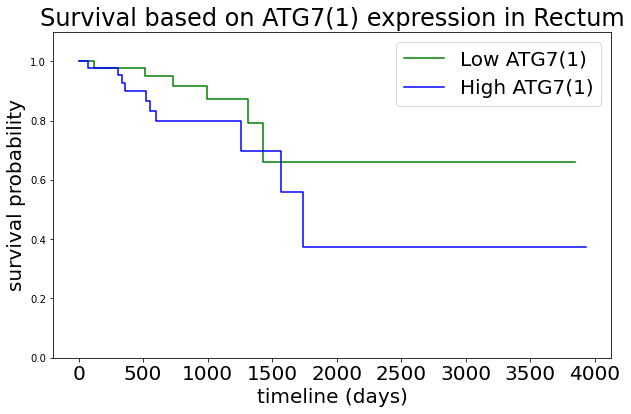

Results for  ATG7(2) in Rectum


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.26 0.02      5.52

<Figure size 864x576 with 0 Axes>

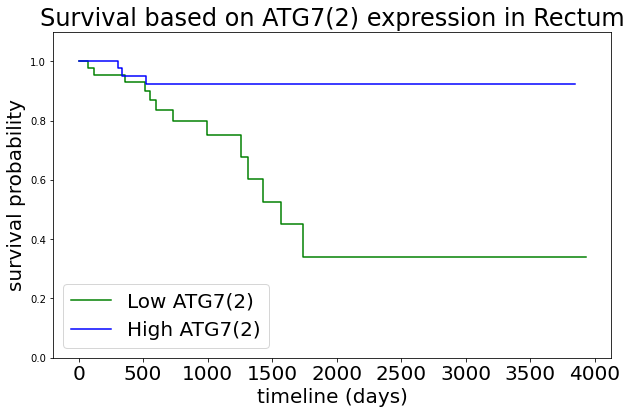

-------------------------------------------------------------------------

For Lining Of Body Cavities


<lifelines.CoxPHFitter: fitted with 86 total observations, 13 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 86
number of events observed = 73
   partial log-likelihood = -261.73
         time fit was run = 2022-02-26 11:47:38 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.20       1.23       0.58            -0.94             1.35                 0.39                 3.85
ATG7_1     -0.50       0.61       0.45            -1.39             0.39                 0.25                 1.47
ATG7_2      0.02       1.02       0.06            -0.10             0.15                 0.90                 1.16
ATG7_3     -0.04       0.96       0.04            -0.11             0.03                 0.89                 1.03

              z    p   -log2(p)
covariate                      
ATG7       0.35 0.73       0.46
ATG7_1    -1.11 0.27       1.90
ATG7_2     0.33 0.74       0.43
ATG7_3    -1.08 0.28       1.83
---
Concordance = 0.55
Partial AIC = 531.45
log-likelihood ratio test = 4.23 on 4 df
-log2(p) of ll-ratio test = 1.41

Results for  ATG7(1) in Lining Of Body Cavities


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.98 0.05      4.44

<Figure size 864x576 with 0 Axes>

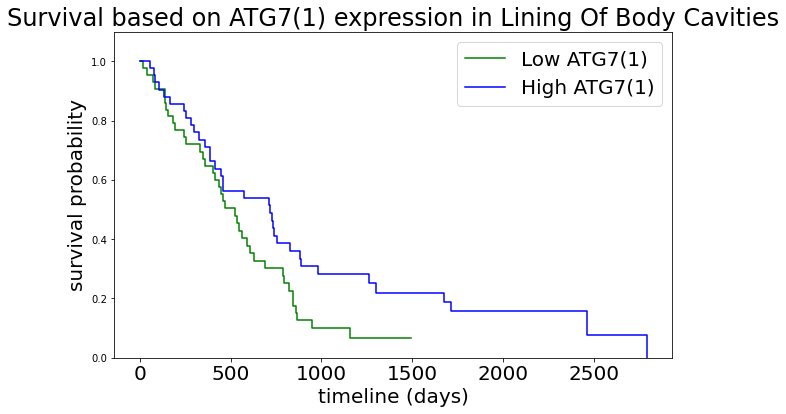

Results for  ATG7(2) in Lining Of Body Cavities


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.30 0.26      1.97

<Figure size 864x576 with 0 Axes>

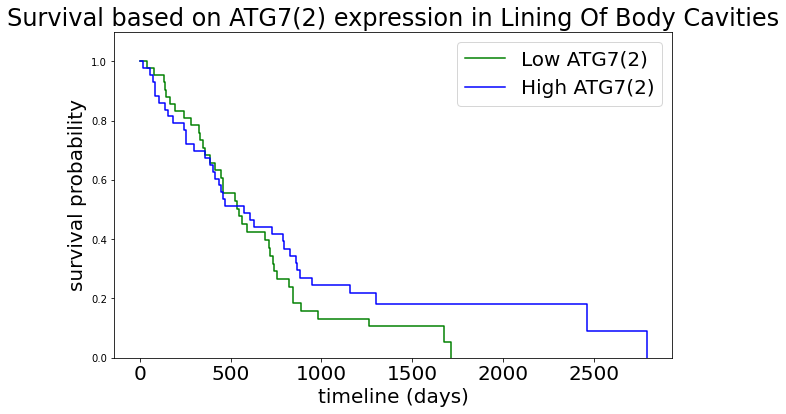

-------------------------------------------------------------------------

For Eye


<lifelines.CoxPHFitter: fitted with 79 total observations, 57 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 79
number of events observed = 22
   partial log-likelihood = -77.93
         time fit was run = 2022-02-26 11:47:39 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7        0.77       2.15       1.02            -1.23             2.77                 0.29                15.93
ATG7_1     -0.70       0.50       0.86            -2.37             0.98                 0.09                 2.67
ATG7_2     -0.04       0.97       0.10            -0.23             0.16                 0.80                 1.17
ATG7_3     -0.07       0.93       0.07            -0.21             0.07                 0.81                 1.07

              z    p   -log2(p)
covariate                      
ATG7       0.75 0.45       1.14
ATG7_1    -0.81 0.42       1.26
ATG7_2    -0.36 0.72       0.48
ATG7_3    -0.98 0.33       1.62
---
Concordance = 0.59
Partial AIC = 163.86
log-likelihood ratio test = 1.17 on 4 df
-log2(p) of ll-ratio test = 0.18

Results for  ATG7(1) in Eye


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.22 0.64      0.64

<Figure size 864x576 with 0 Axes>

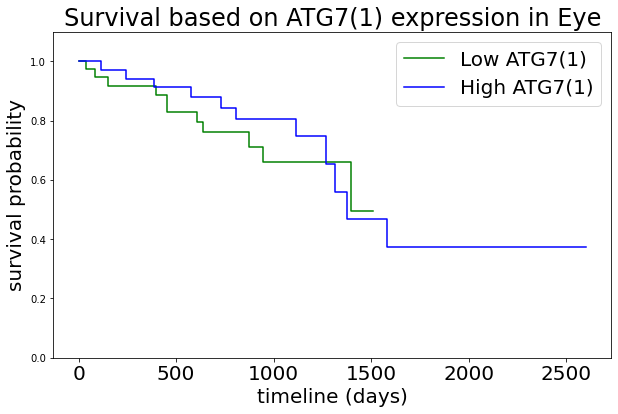

Results for  ATG7(2) in Eye


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.40 0.53      0.92

<Figure size 864x576 with 0 Axes>

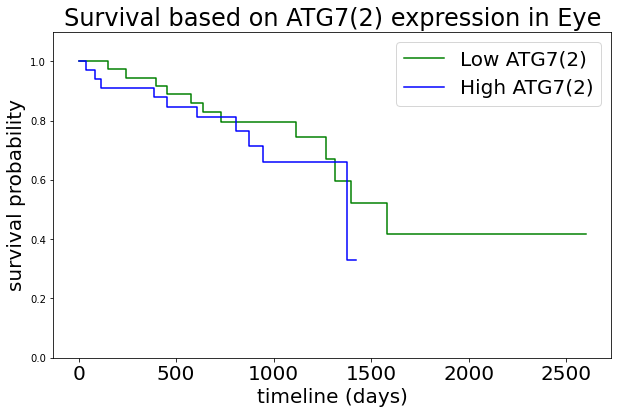

-------------------------------------------------------------------------

For Adrenal Gland


<lifelines.CoxPHFitter: fitted with 77 total observations, 50 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 77
number of events observed = 27
   partial log-likelihood = -103.47
         time fit was run = 2022-02-26 11:47:40 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.02       0.98       0.85            -1.67             1.64                 0.19                 5.17
ATG7_1      0.07       1.08       0.88            -1.65             1.80                 0.19                 6.02
ATG7_2     -0.01       0.99       0.07            -0.14             0.12                 0.87                 1.13
ATG7_3      0.01       1.01       0.06            -0.12             0.13                 0.89                 1.14

              z    p   -log2(p)
covariate                      
ATG7      -0.02 0.99       0.02
ATG7_1     0.08 0.93       0.10
ATG7_2    -0.11 0.91       0.14
ATG7_3     0.10 0.92       0.12
---
Concordance = 0.49
Partial AIC = 214.94
log-likelihood ratio test = 0.05 on 4 df
-log2(p) of ll-ratio test = 0.00

Results for  ATG7(1) in Adrenal Gland


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.17 0.68      0.55

<Figure size 864x576 with 0 Axes>

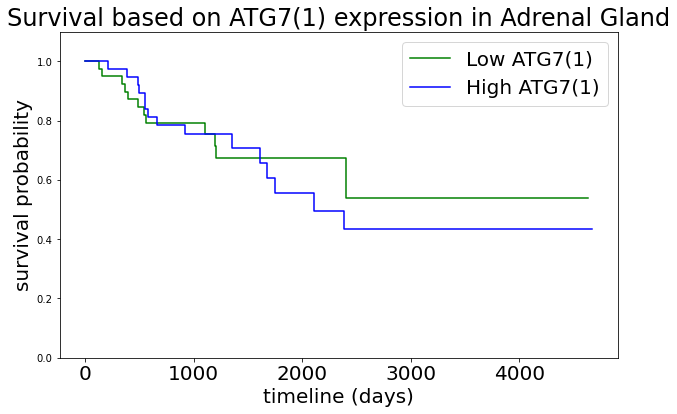

Results for  ATG7(2) in Adrenal Gland


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 0.96      0.06

<Figure size 864x576 with 0 Axes>

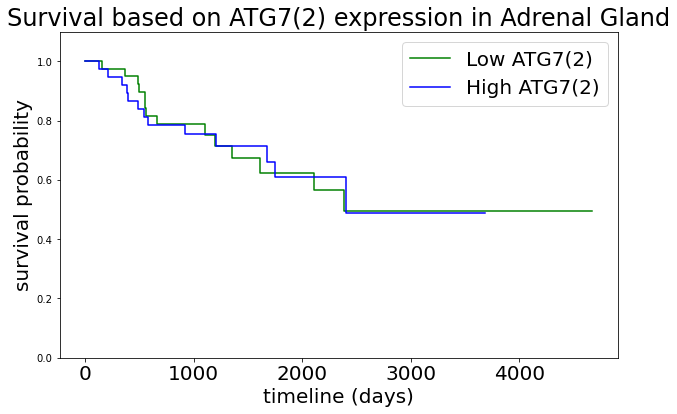

-------------------------------------------------------------------------

For Uterus


<lifelines.CoxPHFitter: fitted with 57 total observations, 22 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 57
number of events observed = 35
   partial log-likelihood = -114.89
         time fit was run = 2022-02-26 11:47:40 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -1.09       0.34       0.92            -2.89             0.72                 0.06                 2.05
ATG7_1      0.81       2.25       0.81            -0.78             2.40                 0.46                11.03
ATG7_2      0.05       1.06       0.07            -0.09             0.20                 0.91                 1.22
ATG7_3      0.04       1.04       0.06            -0.07             0.16                 0.93                 1.17

              z    p   -log2(p)
covariate                      
ATG7      -1.18 0.24       2.07
ATG7_1     1.00 0.32       1.66
ATG7_2     0.74 0.46       1.12
ATG7_3     0.73 0.46       1.11
---
Concordance = 0.59
Partial AIC = 237.79
log-likelihood ratio test = 1.51 on 4 df
-log2(p) of ll-ratio test = 0.28

Results for  ATG7(1) in Uterus


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.32 0.57      0.81

<Figure size 864x576 with 0 Axes>

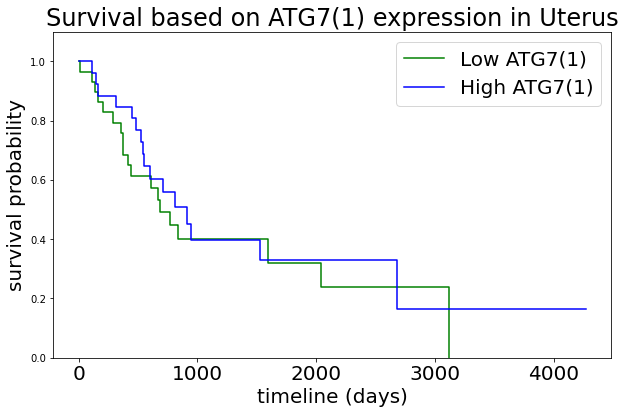

Results for  ATG7(2) in Uterus


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.27 0.60      0.73

<Figure size 864x576 with 0 Axes>

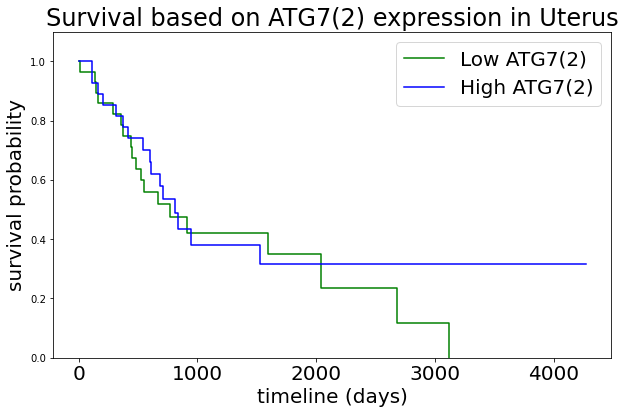

-------------------------------------------------------------------------

For Lymphatic Tissue


<lifelines.CoxPHFitter: fitted with 47 total observations, 38 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 47
number of events observed = 9
   partial log-likelihood = -22.04
         time fit was run = 2022-02-26 11:47:41 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -0.82       0.44       1.06            -2.90             1.26                 0.06                 3.52
ATG7_1     -1.36       0.26       1.10            -3.51             0.79                 0.03                 2.20
ATG7_2     -0.16       0.85       0.17            -0.51             0.18                 0.60                 1.19
ATG7_3      0.06       1.06       0.15            -0.24             0.36                 0.79                 1.44

              z    p   -log2(p)
covariate                      
ATG7      -0.77 0.44       1.19
ATG7_1    -1.24 0.21       2.22
ATG7_2    -0.95 0.34       1.54
ATG7_3     0.41 0.68       0.55
---
Concordance = 0.78
Partial AIC = 52.09
log-likelihood ratio test = 8.05 on 4 df
-log2(p) of ll-ratio test = 3.48

Results for  ATG7(1) in Lymphatic Tissue


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.24 0.04      4.66

<Figure size 864x576 with 0 Axes>

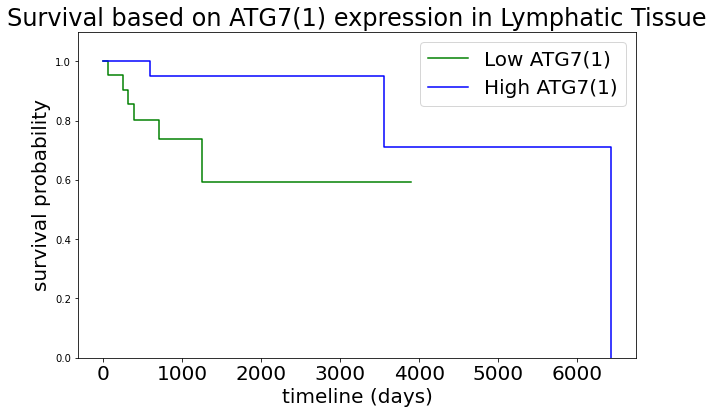

Results for  ATG7(2) in Lymphatic Tissue


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.04 0.85      0.24

<Figure size 864x576 with 0 Axes>

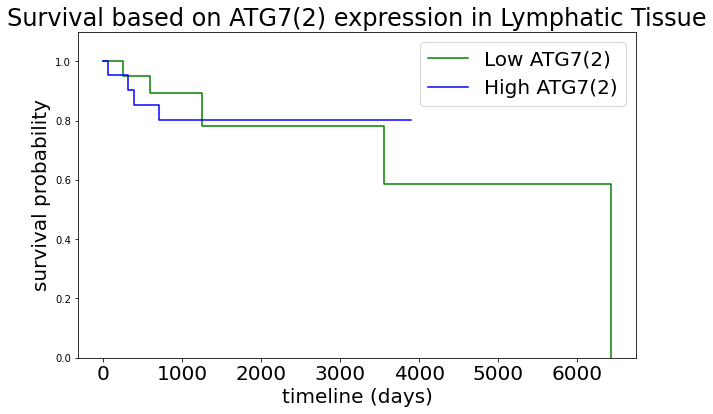

-------------------------------------------------------------------------

For Bile Duct


<lifelines.CoxPHFitter: fitted with 36 total observations, 18 right-censored observations>
             duration col = 'OS_time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 36
number of events observed = 18
   partial log-likelihood = -50.25
         time fit was run = 2022-02-26 11:47:42 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
ATG7       -2.48       0.08       1.55            -5.51             0.56                 0.00                 1.74
ATG7_1      1.68       5.38       1.21            -0.69             4.06                 0.50                57.94
ATG7_2      0.26       1.29       0.16            -0.06             0.58                 0.94                 1.78
ATG7_3      0.07       1.07       0.11            -0.15             0.29                 0.86                 1.33

              z    p   -log2(p)
covariate                      
ATG7      -1.60 0.11       3.19
ATG7_1     1.39 0.17       2.60
ATG7_2     1.57 0.12       3.10
ATG7_3     0.60 0.55       0.86
---
Concordance = 0.64
Partial AIC = 108.51
log-likelihood ratio test = 4.55 on 4 df
-log2(p) of ll-ratio test = 1.57

Results for  ATG7(1) in Bile Duct


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.44 0.51      0.97

<Figure size 864x576 with 0 Axes>

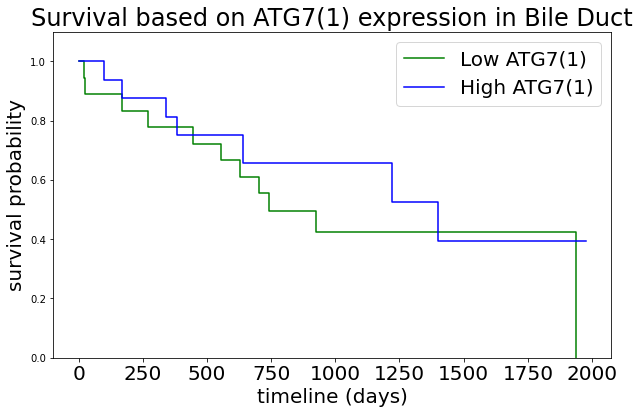

Results for  ATG7(2) in Bile Duct


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.62 0.20      2.30

<Figure size 864x576 with 0 Axes>

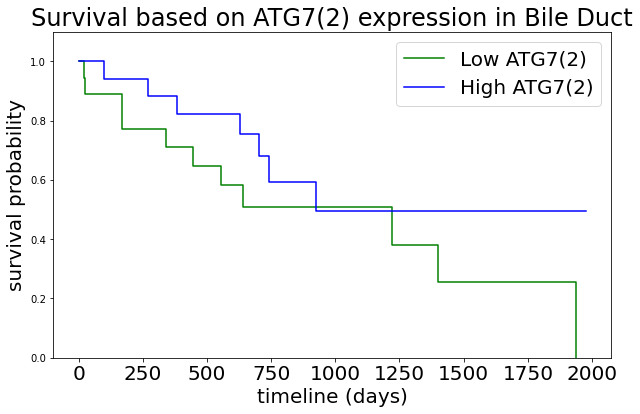

-------------------------------------------------------------------------



<Figure size 864x576 with 0 Axes>

In [17]:
#Kaplan Meier for all tissues 
isoforms = [["ATG7_1", "iso1"], ["ATG7_2", "iso2"]]

#create df_site for each primary site (tissue)
for i in range(len(tissue_labels)):
    tissue = tissue_labels[i]
    print('For', tissue)

    text_site = 'Primary_Site == ' + "'" + tissue + "'"
    df_site = df_ATG7_Prim.query(text_site)
    
    # STATS CoxPHFitter: Does ATG7 expression affect survival ?
    cph = CoxPHFitter()
    df = df_site.iloc[:,3:9]
    cph.fit(df,'OS_time', 'OS')
    cph.print_summary()

    #Preparation for Kaplan Meier graph 
    #Split this df_site and split it in two groups of expression
    df_LoHi = [] 
    for isoform in isoforms:
        xMed = df_site[isoform[0]].median()
#         print("For",isoform[0], "median is", xMed)

        #create Low
        text_low =  isoform[0] + '<= ' + str(xMed)
        low = df_site.query(text_low).copy()
        low['L/H'] = "Low_"+isoform[1]
        #move the column
        col = low.pop('L/H')
        low.insert(3, 'L/H', col)

        #create High
        text_high =  isoform[0] + '> ' + str(xMed)
        high = df_site.query(text_high).copy()
        high['L/H'] = "High_"+isoform[1]
        #move the column
        col = high.pop('L/H')
        high.insert(3, 'L/H', col)

        #save
        df_LoHi.append(low)
        df_LoHi.append(high)
    
    #split in two df
    df_iso1_Low = df_LoHi[0]
    df_iso1_High = df_LoHi[1]
    df_iso2_Low = df_LoHi[2]
    df_iso2_High = df_LoHi[3]
    
    #Plot the graph and some data
    #Kaplan Meier
    ##Create survival table 
    kmf_low = KaplanMeierFitter() 
    kmf_high = KaplanMeierFitter()
#     print("Survival probability at 6000 days/ 16 years:")
    
    all_data = [["ATG7(1)", df_iso1_Low, df_iso1_High], 
                ["ATG7(2)", df_iso2_Low, df_iso2_High]]

    tables_kmf = []
    for data in all_data:
        
         # STATS_Log-Rank Test: Does ATG7 expression affect survival ?
        Time=data[1]['OS_time']
        Event=data[1]['OS']
        Time2=data[2]['OS_time']
        Event2=data[2]['OS']

        results = logrank_test(Time,Time2,event_observed_A=Event, event_observed_B=Event2)
        
        print("Results for ", data[0], 'in', tissue)
        results.print_summary()
        
        #GRAPH_ Kaplan Meier
        ##Low expression
        kmf_low.fit(data[1]['OS_time'], data[1]['OS'], label = "Low_KM_estim")
#         print("For", data[0], "in low group:",  kmf_low.predict(6000))
        table_kmf_Low = kmf_low.survival_function_
        label1 = "Low "+ data[0]
        ##High expression
        kmf_high.fit(data[2]['OS_time'], data[2]['OS'], label = 'High_KM_estim')    
#         print("For", data[0], "in high group:",  kmf_high.predict(6000))
        table_kmf_High = kmf_high.survival_function_
        label2 = "High "+ data[0]
        
        #save data
        tables_kmf.append(table_kmf_Low)
        tables_kmf.append(table_kmf_High)

        #Plot
        plt.figure(figsize=(10,6))
        seaborn.lineplot(data=table_kmf_Low, x='timeline', y='Low_KM_estim', color = "green", drawstyle='steps-post', label = label1)
        seaborn.lineplot(data=table_kmf_High, x='timeline', y='High_KM_estim', color = "blue", drawstyle='steps-post', label = label2)
        plt.ylim(0,1.1) 
        plt.xlabel('timeline (days)')
        plt.ylabel('survival probability')

        title_text = "Survival based on "+data[0]+ " expression in "+tissue
        plt.title(title_text)
        plt.show()
        
        #save to csv
        path = 'ATG7/figs_survival/tissu_specific/'
        title_file = tissue+'_primary_kaplan_m_'+data[0]+'.svg'
        plt.savefig(output_file_directory+path+title_file)

    print('-------------------------------------------------------------------------')
    print()